In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.lines import Line2D

In [ ]:
data_pure = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
data = data_pure[data_pure['continent'] == 'Europe'].drop(columns=["continent"])

In [ ]:
columns = ['iso_code', 'date', 'total_cases_per_million',
       'new_cases_per_million','new_cases_smoothed_per_million', 'new_deaths_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_icu_admissions_per_million',
       'weekly_hosp_admissions_per_million', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index', 'population_density', 'median_age', 
       'aged_65_older', 'gdp_per_capita', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']

In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }
font2 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 22,
        }

## Wykres Reproduction Rate (Podstawowa liczba odtwarzania)

In [ ]:
Repr_rate = data[columns].copy()
Repr_rate[['date']] = pd.to_datetime(Repr_rate['date'], format = '%Y-%m-%d')
countries = ['POL', 'DEU', 'FRA', 'ITA']
plot_data = Repr_rate[Repr_rate['iso_code'].isin(countries)]
plot_notin_data = Repr_rate[~Repr_rate['iso_code'].isin(countries)]


In [ ]:
wid = 3
custom_legend = [Line2D([0], [0], color='tab:orange', lw=wid),
                 Line2D([0], [0], color='b', lw=wid),
                Line2D([0], [0], color='g', lw=wid),
                Line2D([0], [0], color='r', lw=wid),
                Line2D([0], [0], color='grey', lw=wid)]

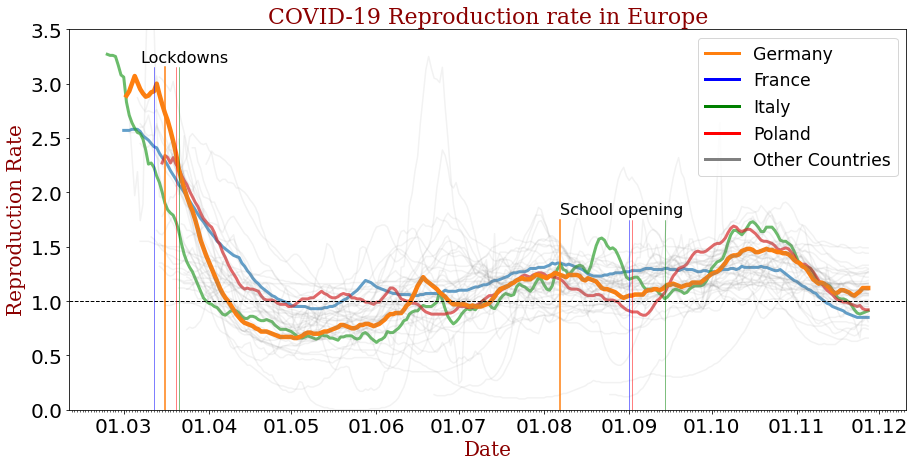

In [ ]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.lineplot(data=plot_data, x="date", y="reproduction_rate", hue = "iso_code", alpha = 0.7, linewidth = 3.0)
sns.lineplot(data=plot_data[plot_data['iso_code'] == 'DEU'], x = "date", y = "reproduction_rate", linewidth = 4.5)
sns.lineplot(data=plot_notin_data, x="date", y="reproduction_rate", hue = "iso_code", 
             palette=['grey']*plot_notin_data['iso_code'].nunique(), alpha = 0.1, legend = False)
countries_names = ", ".join(countries)
plt.title(f"COVID-19 Reproduction rate in Europe", fontdict = font2)

ax.axhline(1.0, ls = '--', color = 'black', linewidth = 1)
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%d.%m'))
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))
ax.legend(custom_legend, ['Germany', 'France', 'Italy', 'Poland', 'Other Countries'], loc = 'upper right', fontsize = 'xx-large')

ax.tick_params(axis='both', which='major', labelsize=20)

plt.axvline(x=pd.to_datetime('2020-09-02'), ymax=0.5, linewidth=0.5, color='r')
plt.axvline(x=pd.to_datetime('2020-03-20'), ymax=0.9, linewidth=0.5, color='r')
plt.axvline(x=pd.to_datetime('2020-03-21'), ymax=0.9, linewidth=0.5, color='g')
plt.axvline(x=pd.to_datetime('2020-09-14'), ymax=0.5, linewidth=0.5, color='g')
plt.axvline(x=pd.to_datetime('2020-08-07'), ymax=0.5, linewidth=1.5, color='tab:orange')
plt.axvline(x=pd.to_datetime('2020-03-16'), ymax=0.9, linewidth=1.5, color='tab:orange')
plt.axvline(x=pd.to_datetime('2020-03-12'), ymax=0.9, linewidth=0.5, color='b')
plt.axvline(x=pd.to_datetime('2020-09-01'), ymax=0.5, linewidth=0.5, color='b')

size = 16
plt.ylabel('Reproduction Rate', fontdict = font)
plt.xlabel('Date',fontdict = font)
plt.text(pd.to_datetime('2020-03-07'), 3.2, "Lockdowns", fontsize = size)
plt.text(pd.to_datetime('2020-08-07'), 1.8, "School opening", fontsize = size)
plt.ylim(0,3.5)

plt.savefig('Reproduction_rate_first.svg', format='svg', dpi=1200, transparent = True)
plt.show()

## Wykres nowych przypadków (wyrównane średnią 7 dni)

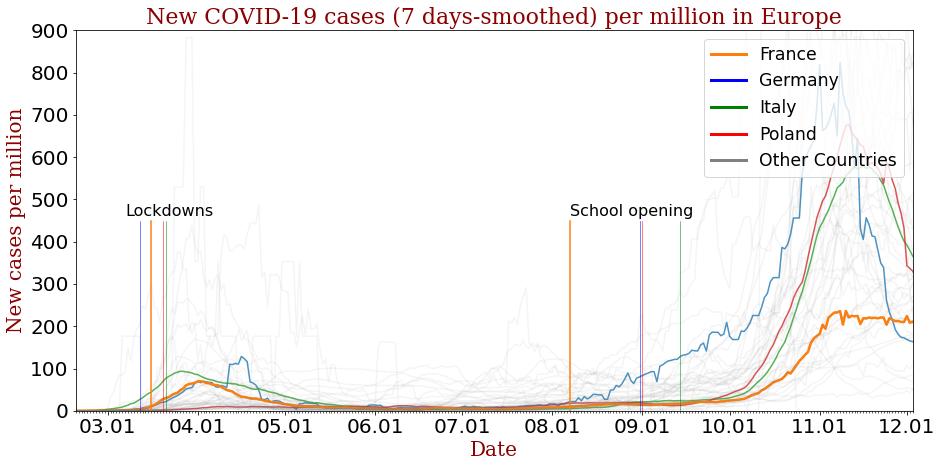

In [ ]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.lineplot(data=plot_data, x="date", y="new_cases_smoothed_per_million", hue = "iso_code", alpha = 0.8, linewidth = 3.0)
sns.lineplot(data=plot_data[plot_data['iso_code'] == 'DEU'], x = "date", y = "new_cases_smoothed_per_million", linewidth = 4.5)
sns.lineplot(data=plot_notin_data, x="date", y="new_cases_smoothed_per_million", hue = "iso_code", 
             palette=['grey']*plot_notin_data['iso_code'].nunique(), alpha = 0.1, legend = False)
plt.title("New COVID-19 cases (7 days-smoothed) per million in Europe", fontdict = font2)
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%m.%d'))
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))
ax.legend(custom_legend, ['France', 'Germany', 'Italy', 'Poland', 'Other Countries'], loc = 'upper right', fontsize = 'xx-large')

ax.tick_params(axis='both', which='major', labelsize=20)

height = 0.5
plt.axvline(x=pd.to_datetime('2020-09-01'), ymax=height, linewidth=0.5, color='r')
plt.axvline(x=pd.to_datetime('2020-03-20'), ymax=height, linewidth=0.5, color='r')
plt.axvline(x=pd.to_datetime('2020-03-21'), ymax=height, linewidth=0.5, color='g')
plt.axvline(x=pd.to_datetime('2020-09-14'), ymax=height, linewidth=0.5, color='g')
plt.axvline(x=pd.to_datetime('2020-08-07'), ymax=height, linewidth=1.5, color='tab:orange')
plt.axvline(x=pd.to_datetime('2020-03-16'), ymax=height, linewidth=1.5, color='tab:orange')
plt.axvline(x=pd.to_datetime('2020-03-12'), ymax=height, linewidth=0.5, color='b')
plt.axvline(x=pd.to_datetime('2020-08-31'), ymax=height, linewidth=0.5, color='b')
plt.ylabel('New cases per million', fontdict = font)
plt.xlabel('Date', fontdict = font)
plt.text(pd.to_datetime('2020-03-07'), 460.0, "Lockdowns", fontsize=size)
plt.text(pd.to_datetime('2020-08-07'), 460.0, "School opening", fontsize=size)
plt.xlim(pd.to_datetime('2020-02-19'), pd.to_datetime('2020-12-03'))
plt.ylim(0,900)

plt.savefig('New_cases_second.svg', format='svg', dpi=1200, transparent = True)
plt.show()

In [ ]:
#df=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
df = data_pure
response=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/bsg/COVID%20Government%20Response%20(OxBSG).csv")
f=df[['location','date','total_cases','new_cases','reproduction_rate']].fillna(0).reset_index()


In [ ]:
from datetime import date, timedelta
response=response.fillna(0)
school=response[response['school_closures']>1].reset_index()
school[((school['Year']-1)!=school['Year'].shift() )|( school['Country']!=school['Country'].shift(-1))]
schoolstart=school[((school['Year']-1)!=school['Year'].shift() )]
schoolend=response[(response['school_closures'].shift()>=2)&(response['Country']==response['Country'].shift())&(response['school_closures']<=1) ]
temp=schoolstart
temp['Date']=date(2020,1,1)
temp['Status']='Start'
temp2=schoolend
temp2['Date']=date(2020,1,1)
temp2['Status']='End'
list1=pd.to_datetime(temp['Date'], format='%Y-%m-%d')+pd.to_timedelta(schoolstart['Year'], unit='d')
list1=list1.to_frame()
list2=pd.to_datetime(temp2['Date'], format='%Y-%m-%d')+pd.to_timedelta(schoolend['Year'], unit='d')
list2=list2.to_frame()
result1 = pd.concat([schoolstart, list1], axis=1, sort=False)
result2 = pd.concat([schoolend, list2], axis=1, sort=False)
result=result1.append(result2)
result=result.sort_values(by=['Year'])
result=result.sort_values(by=['Country','Year']).reset_index()
del result['index']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

## Kraje najczęściej zamykające szkoły

In [ ]:
result1=result1.sort_values(by=['Country'])
test=pd.concat([result1['Country']. value_counts().to_frame(),result2['Country']. value_counts().to_frame()], axis=1).fillna(0)
test.columns=["Closing","Opening"]
test.head(10)


,Closing,Opening
Greece,4,4
Sri Lanka,3,3
Israel,3,3
Malaysia,3,3
Vietnam,3,3
Portugal,3,3
France,3,3
China,3,3
South Korea,3,3
San Marino,2,2


In [ ]:
result[result['Country']=="Greece"]

,level_0,Country,Year,school_closures,workplace_closures,cancel_public_events,restriction_gatherings,close_public_transport,stay_home_requirements,restrictions_internal_movements,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_healthcare,investment_vaccines,facial_coverings,vaccination_policy,stringency_index,containment_index,Date,Status,0
164,12907,Greece,64,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,28.70,19.87,2020-01-01,Start,2020-03-05
165,22922,Greece,152,1.0,0.0,2.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,54.63,54.49,2020-01-01,End,2020-06-01
166,12995,Greece,173,3.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,46.30,48.72,2020-01-01,Start,2020-06-22
167,22948,Greece,178,1.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,2.0,0.0,40.74,47.44,2020-01-01,End,2020-06-27
168,13000,Greece,251,3.0,0.0,2.0,3.0,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,2.0,0.0,64.81,64.10,2020-01-01,Start,2020-09-08
169,23027,Greece,257,1.0,0.0,2.0,3.0,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,2.0,0.0,57.41,58.97,2020-01-01,End,2020-09-14
170,13006,Greece,306,2.0,2.0,2.0,4.0,1.0,1.0,2.0,3.0,2.0,2.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,4.0,0.0,63.43,66.03,2020-01-01,Start,2020-11-02
171,23114,Greece,344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2020-01-01,End,2020-12-10


0 - no measures
1 - recommend closing or all schools open with alterations resulting in significant differences compared to non-Covid-19 operations
2 - require closing (only some levels or categories, eg just high school, or just public schools)
3 - require closing all levels
Blank - no data

In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 24,
        }
font2 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 27,
        }

## Jak zamykanie szkół wpływa na reproduction rate

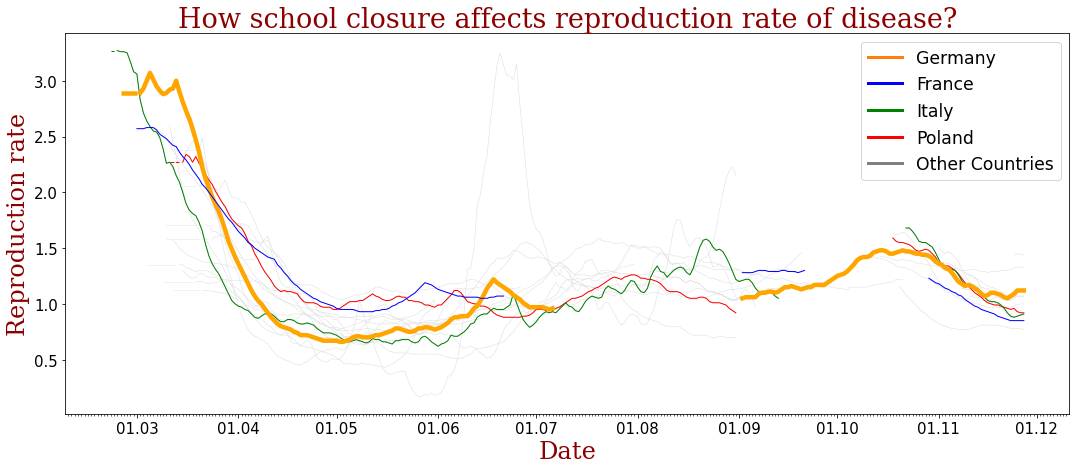

In [ ]:
import datetime
pd.set_option("display.max_rows", None, "display.max_columns", None)

fig, ax = plt.subplots(figsize = (18, 7))
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%d.%m'))
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))
ax.tick_params(axis='both', which='major', labelsize=15)

f[['date']] = pd.to_datetime(f['date'], format = '%Y-%m-%d')
locations=["Greece","Moldova","Poland","France","Italy","Hungary","Austria","Ireland","Spain","Norway","Croatia", "Latvia","Denmark","Serbia","Slovakia","Slovenia"]

for loc in locations:
  test5=result[(result['Country']==loc)].reset_index()
  copy1=f[f['location']==loc].reset_index()
  for i in range(len(test5)//2):
      a=test5.at[2*i,'Year']-23
      b=test5.at[2*i+1,'Year']-22
      answe=copy1.iloc[a:b]

      answe=answe[answe['reproduction_rate']>0]
      check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]

 
      plt.plot(answe['date'],answe['reproduction_rate'],'gainsboro', linewidth=0.5, label='_nolegend_')    
  a=test5.at[2*0,'Year']-23
  b=test5.at[2*0+1,'Year']-22
  answe2=copy1.iloc[a:b]
  answe=answe2
  answe=answe[answe['reproduction_rate']>0]
  answe2=answe2[answe2['reproduction_rate']==0]
  check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]
  check2=np.ones(len(answe2['date']))*check
  plt.plot(answe2['date'],check2,'gainsboro',linestyle="dashed", linewidth=0.5, label='_nolegend_')

test5=result[(result['Country']=='Italy')].reset_index()
copy1=f[f['location']=='Italy'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]

    check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]

    answe=answe[answe['reproduction_rate']>0]

    plt.plot(answe['date'],answe['reproduction_rate'],'gainsboro', linewidth=0.5, label='_nolegend_')    
test5=result[(result['Country']=='Germany')].reset_index()
copy1=f[f['location']=='Germany'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]

    check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]

    answe=answe[answe['reproduction_rate']>0]

    plt.plot(answe['date'],answe['reproduction_rate'],'gainsboro', linewidth=0.5, label='_nolegend_')
plt.plot(answe['date'],answe['reproduction_rate'],'gainsboro', linewidth=0.5, label='Other Countries')
test5=result[(result['Country']=='Poland')].reset_index()
copy1=f[f['location']=='Poland'].reset_index()
for i in range(len(test5)//2-1):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]

    check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]

    answe=answe[answe['reproduction_rate']>0]

    plt.plot(answe['date'],answe['reproduction_rate'],'r', linewidth=1, label='_nolegend_')

a=test5.at[2*len(test5)//2-2,'Year']-23
b=test5.at[2*len(test5)//2-1,'Year']-22
answe=copy1.iloc[a:b]

check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]

answe=answe[answe['reproduction_rate']>0]

plt.plot(answe['date'],answe['reproduction_rate'],'r', linewidth=1, label='Poland') 
a=test5.at[2*0,'Year']-23
b=test5.at[2*0+1,'Year']-22
answe2=copy1.iloc[a:b]
answe=answe2
answe=answe[answe['reproduction_rate']>0]
answe2=answe2[answe2['reproduction_rate']==0]
check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]
check2=np.ones(len(answe2['date']))*check
plt.plot(answe2['date'],check2,'r',linestyle="dashed", linewidth=1, label='_nolegend_')

test5=result[(result['Country']=='Italy')].reset_index()
copy1=f[f['location']=='Italy'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]

    
    check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]

    answe=answe[answe['reproduction_rate']>0]
 
    plt.plot(answe['date'],answe['reproduction_rate'],'g', linewidth=1, label='_nolegend_')
a=test5.at[len(test5)-1,'Year']-23
b=len(copy1)-1
answe=copy1.iloc[a:b]

check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]

answe=answe[answe['reproduction_rate']>0]
 

plt.plot(answe['date'],answe['reproduction_rate'],'g', linewidth=1, label='Italy') 
a=test5.at[2*0,'Year']-23
b=test5.at[2*0+1,'Year']-22
answe2=copy1.iloc[a:b]
answe=answe2
answe=answe[answe['reproduction_rate']>0]
answe2=answe2[answe2['reproduction_rate']==0]
check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]
check2=np.ones(len(answe2['date']))*check
plt.plot(answe2['date'],check2,'g',linestyle="dashed", linewidth=1, label='_nolegend_')

test5=result[(result['Country']=='Germany')].reset_index()
copy1=f[f['location']=='Germany'].reset_index()
for i in range(len(test5)//2-1):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]

    check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]

    answe=answe[answe['reproduction_rate']>0]
  
    plt.plot(answe['date'],answe['reproduction_rate'],'orange', linewidth=4.5, label='_nolegend_')
a=test5.at[len(test5)-1,'Year']-23
b=len(copy1)-1
answe=copy1.iloc[a:b]
answe=answe[answe['reproduction_rate']>0]
plt.plot(answe['date'],answe['reproduction_rate'],'orange', linewidth=4.5, label='Germany')


a=test5.at[2*0,'Year']-23
b=test5.at[2*0+1,'Year']-22
answe2=copy1.iloc[a:b]
answe=answe2
answe=answe[answe['reproduction_rate']>0]
answe2=answe2[answe2['reproduction_rate']==0]
check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]
check2=np.ones(len(answe2['date']))*check
plt.plot(answe2['date'],check2,'orange',linestyle="dashed", linewidth=4.5, label='_nolegend_')




test5=result[(result['Country']=='France')].reset_index()
copy1=f[f['location']=='France'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]


    answe=answe[answe['reproduction_rate']>0]

    plt.plot(answe['date'],answe['reproduction_rate'],'b', linewidth=1, label='_nolegend_')
a=test5.at[len(test5)-1,'Year']-23
b=len(copy1)-1
answe=copy1.iloc[a:b]


answe=answe[answe['reproduction_rate']>0]


plt.plot(answe['date'],answe['reproduction_rate'],'b', linewidth=1, label='France')
a=test5.at[2*0,'Year']-23
b=test5.at[2*0+1,'Year']-22
answe2=copy1.iloc[a:b]
answe=answe2
answe=answe[answe['reproduction_rate']>0]
answe2=answe2[answe2['reproduction_rate']==0]
check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]
check2=np.ones(len(answe2['date']))*check
plt.plot(answe2['date'],check2,'b',linestyle="dashed", linewidth=1, label='_nolegend_')


plt.xlabel('Date', fontdict=font)
plt.ylabel('Reproduction rate', fontdict=font)

ax.legend(custom_legend, ['Germany', 'France', 'Italy', 'Poland', 'Other Countries'], loc = 'upper right', fontsize = 'xx-large')

plt.title('How school closure affects reproduction rate of disease?', fontdict=font2)
plt.savefig('School.svg', format='svg', dpi=1200, transparent = True)
plt.show()


In [ ]:
from datetime import date, timedelta
response=response.fillna(0)
work=response[response['workplace_closures']>1].reset_index()
work[((work['Year']-1)!=work['Year'].shift() )|( work['Country']!=work['Country'].shift(-1))]
workstart=work[((work['Year']-1)!=work['Year'].shift() )]
workend=response[(response['workplace_closures'].shift()>=2)&(response['Country']==response['Country'].shift())&(response['workplace_closures']<=1) ]
temporary=workstart
temporary['Date']=date(2020,1,1)
temporary['Status']='Start'
temporary2=workend
temporary2['Date']=date(2020,1,1)
temporary2['Status']='End'
lists1=pd.to_datetime(temporary['Date'], format='%Y-%m-%d')+pd.to_timedelta(workstart['Year'], unit='d')
lists1=lists1.to_frame()
lists2=pd.to_datetime(temporary2['Date'], format='%Y-%m-%d')+pd.to_timedelta(workend['Year'], unit='d')
lists2=lists2.to_frame()
results1 = pd.concat([workstart, lists1], axis=1, sort=False)
results2 = pd.concat([workend, lists2], axis=1, sort=False)
results=results1.append(results2)
results=results.sort_values(by=['Year'])
results=results.sort_values(by=['Country','Year'])
del results['index']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

## Jak zamykanie szkół miejsc pracy wpływa na reproduction rate

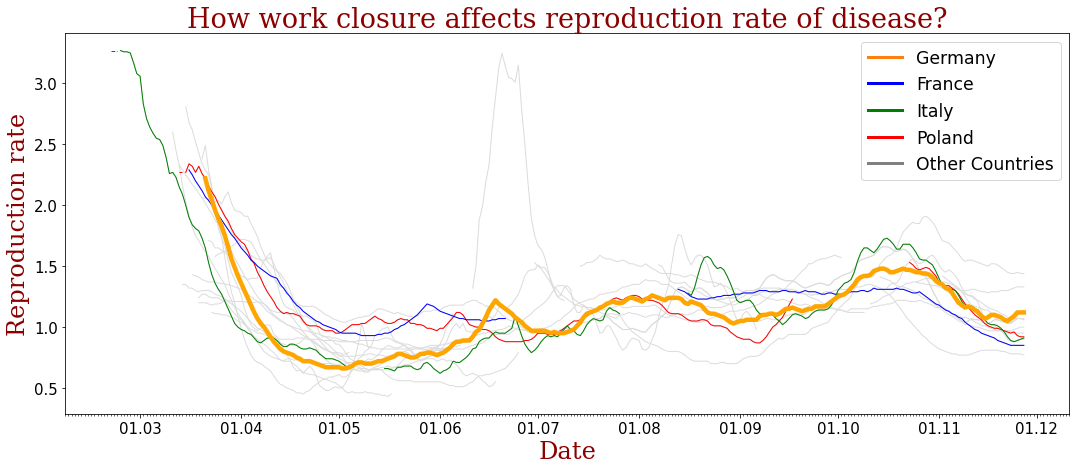

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

fig, ax = plt.subplots(figsize = (18, 7))
f[['date']] = pd.to_datetime(f['date'], format = '%Y-%m-%d')
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%d.%m'))
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))
ax.tick_params(axis='both', which='major', labelsize=15)

for loc in locations:
  test5=results[(results['Country']==loc)].reset_index()
  copy1=f[f['location']==loc].reset_index()
  for i in range(len(test5)//2):
      a=test5.at[2*i,'Year']-23
      b=test5.at[2*i+1,'Year']-22
      answe=copy1.iloc[a:b]
      answe=answe[answe['reproduction_rate']>0]
      plt.plot(answe['date'],answe['reproduction_rate'],'gainsboro', linewidth=1, label='_nolegend_')    

plt.plot(answe['date'],answe['reproduction_rate'],'gainsboro', linewidth=1, label='Other Countries')
test5=results[(results['Country']=='Poland')].reset_index()
copy1=f[f['location']=='Poland'].reset_index()
for i in range(len(test5)//2-1):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    answe=answe[answe['reproduction_rate']>0]
    plt.plot(answe['date'],answe['reproduction_rate'],'r', linewidth=1, label='_nolegend_')

a=test5.at[2*len(test5)//2-2,'Year']-23
b=test5.at[2*len(test5)//2-1,'Year']-22
answe=copy1.iloc[a:b]
answe=answe[answe['reproduction_rate']>0]
plt.plot(answe['date'],answe['reproduction_rate'],'r', linewidth=1, label='Poland')    

a=test5.at[2*0,'Year']-23
b=test5.at[2*0+1,'Year']-22
answe2=copy1.iloc[a:b]
answe=answe2
answe=answe[answe['reproduction_rate']>0]
answe2=answe2[answe2['reproduction_rate']==0]
check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]
check2=np.ones(len(answe2['date']))*check
plt.plot(answe2['date'],check2,'r',linestyle="dashed", linewidth=1, label='_nolegend_')

test5=results[(results['Country']=='France')].reset_index()
copy1=f[f['location']=='France'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    answe=answe[answe['reproduction_rate']>0]
    plt.plot(answe['date'],answe['reproduction_rate'],'b', linewidth=1, label='_nolegend_')
a=test5.at[len(test5)-1,'Year']-23
b=len(copy1)-1
answe=copy1.iloc[a:b]
answe=answe[answe['reproduction_rate']>0]
plt.plot(answe['date'],answe['reproduction_rate'],'b', linewidth=1, label='France')

a=test5.at[2*0,'Year']-23
b=test5.at[2*0+1,'Year']-22
answe2=copy1.iloc[a:b]
answe=answe2
answe=answe[answe['reproduction_rate']>0]
answe2=answe2[answe2['reproduction_rate']==0]
check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]
check2=np.ones(len(answe2['date']))*check
plt.plot(answe2['date'],check2,'b',linestyle="dashed", linewidth=1, label='_nolegend_')

test5=results[(results['Country']=='Italy')].reset_index()
copy1=f[f['location']=='Italy'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    answe=answe[answe['reproduction_rate']>0]
    plt.plot(answe['date'],answe['reproduction_rate'],'g', linewidth=1, label='_nolegend_')
a=test5.at[len(test5)-1,'Year']-23
b=len(copy1)-1
answe=copy1.iloc[a:b]
answe=answe[answe['reproduction_rate']>0]
plt.plot(answe['date'],answe['reproduction_rate'],'g', linewidth=1, label='Italy')

a=test5.at[2*0,'Year']-23
b=test5.at[2*0+1,'Year']-22
answe2=copy1.iloc[a:b]
answe=answe2
answe=answe[answe['reproduction_rate']>0]
answe2=answe2[answe2['reproduction_rate']==0]
check=answe['reproduction_rate'].reset_index()['reproduction_rate'][0]
check2=np.ones(len(answe2['date']))*check
plt.plot(answe2['date'],check2,'g',linestyle="dashed", linewidth=1, label='_nolegend_')

test5=results[(results['Country']=='Germany')].reset_index()
copy1=f[f['location']=='Germany'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    answe=answe[answe['reproduction_rate']>0]
    plt.plot(answe['date'],answe['reproduction_rate'],'orange', linewidth=4.5, label='_nolegend_')
a=test5.at[len(test5)-1,'Year']-23
b=len(copy1)-1
answe=copy1.iloc[a:b]
answe=answe[answe['reproduction_rate']>0]
plt.plot(answe['date'],answe['reproduction_rate'],'orange', linewidth=4.5, label='Germany')


plt.xlabel('Date', fontdict=font)
plt.ylabel('Reproduction rate', fontdict=font)
plt.title('How work closure affects reproduction rate of disease?', fontdict=font2)
ax.legend(custom_legend, ['Germany', 'France', 'Italy', 'Poland', 'Other Countries'], loc = 'upper right', fontsize = 'xx-large')
plt.savefig('Work.svg', format='svg', dpi=1200, transparent = True)
plt.show()



# Pierwsza a druga fala


In [ ]:
import datetime 

wave1_begin = datetime.datetime(2020, 2, 29)
wave1_end = datetime.datetime(2020, 5, 1)
wave2_begin = datetime.datetime(2020, 9, 30)
wave2_end = datetime.datetime(2020, 12, 1)

Waves = data[columns].copy()
Waves[['date']] = pd.to_datetime(Waves['date'], format = '%Y-%m-%d')
countries = ['POL', 'DEU', 'FRA', 'ITA']
Waves = Waves[['iso_code', 'date', 'new_cases_smoothed_per_million']]

plot_data_Waves = Waves[Waves['iso_code'].isin(countries)].reset_index()
plot_notindata_Waves = Waves[~Waves['iso_code'].isin(countries)]

plot_data_Wave1 = plot_data_Waves[wave1_begin < plot_data_Waves['date']]
plot_data_Wave1 = plot_data_Wave1[plot_data_Wave1['date'] < wave1_end].reset_index().drop(columns=["index"])

plot_notindata_Wave1 = plot_notindata_Waves[wave1_begin < plot_notindata_Waves['date']]
plot_notindata_Wave1 = plot_notindata_Wave1[plot_notindata_Wave1['date'] < wave1_end].reset_index().drop(columns=["index"])

plot_data_Wave2 = plot_data_Waves[wave2_begin < plot_data_Waves['date']]
plot_data_Wave2 = plot_data_Wave2[wave2_end > plot_data_Wave2['date']].reset_index().drop(columns=["index"])

plot_notindata_Wave2 = plot_notindata_Waves[wave2_begin < plot_notindata_Waves['date']]
plot_notindata_Wave2 = plot_notindata_Wave2[plot_notindata_Wave2['date'] < wave2_end].reset_index().drop(columns=["index"])

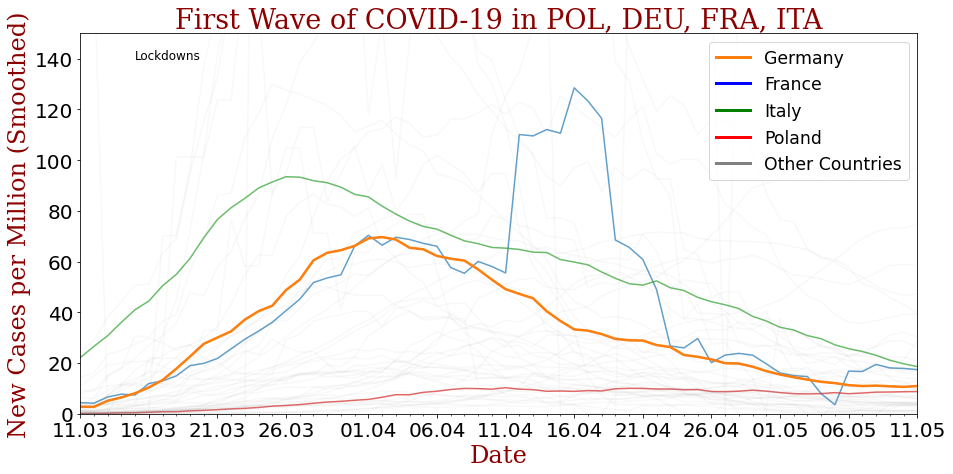

In [ ]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.lineplot(data=plot_data_Wave1, x="date", y="new_cases_smoothed_per_million", hue = "iso_code", alpha = 0.7, linewidth = 3)
sns.lineplot(data=plot_data_Wave1[plot_data_Wave1['iso_code'] == 'DEU'], x = "date", y = "new_cases_smoothed_per_million", linewidth = 4.5)
sns.lineplot(data=plot_notindata_Wave1, x="date", y="new_cases_smoothed_per_million", hue = "iso_code", palette=['grey']*plot_notindata_Wave1['iso_code'].nunique(), alpha = 0.1, legend = False)
plt.ylim(0, 150)
plt.xlim(wave1_begin + datetime.timedelta(days=1), wave1_end - datetime.timedelta(days=1))

ax.legend(custom_legend, ['Germany', 'France', 'Italy', 'Poland', 'Other Countries'], loc = 'upper right',  fontsize = 'xx-large')

ax.tick_params(axis='both', which='major', labelsize=20)

plt.ylabel('New Cases per Million (Smoothed)', fontdict=font)
plt.xlabel('Date', fontdict=font)
countries_names = ", ".join(countries)
plt.title(f"First Wave of COVID-19 in Europe", fontdict = font2)

ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=[1, 6, 11, 16, 21, 26]))
ax.xaxis.set_major_formatter(md.DateFormatter('%d.%m'))
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.savefig('First_Wave.svg', format='svg', dpi=1200, transparent = True)
plt.show()

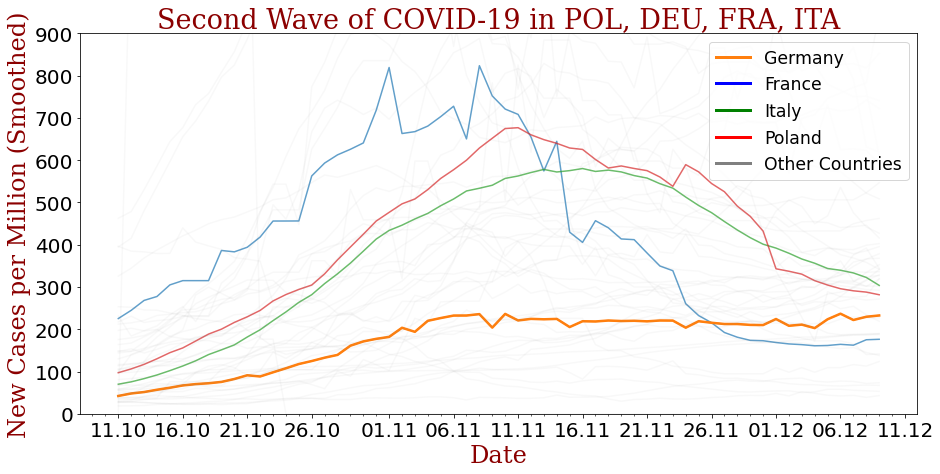

In [ ]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.lineplot(data=plot_data_Wave2, x="date", y="new_cases_smoothed_per_million", hue = "iso_code", alpha = 0.7, linewidth = 3)
sns.lineplot(data=plot_data_Wave2[plot_data_Wave2['iso_code'] == 'DEU'], x = "date", y = "new_cases_smoothed_per_million", linewidth = 4.5)
sns.lineplot(data=plot_notindata_Wave2, x="date", y="new_cases_smoothed_per_million", hue = "iso_code", palette=['grey']*plot_notindata_Wave2['iso_code'].nunique(), alpha = 0.1, legend = False)
plt.ylim(0, 900)
plt.xlim(wave2_begin + datetime.timedelta(days=1), wave2_end - datetime.timedelta(days=1))


ax.legend(custom_legend, ['Germany', 'France', 'Italy', 'Poland', 'Other Countries'], loc = 'upper right',  fontsize = 'xx-large')

ax.tick_params(axis='both', which='major', labelsize=20)

plt.ylabel('New Cases per Million (Smoothed)', fontdict=font)
plt.xlabel('Date', fontdict=font)
plt.title(f"Second Wave of COVID-19 in Europe", fontdict = font2)


ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=[1, 6, 11, 16, 21, 26]))
ax.xaxis.set_major_formatter(md.DateFormatter('%d.%m'))
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.savefig('Second_Wave.svg', format='svg', dpi=1200, transparent = True)
plt.show()